Задача: вытащить с Head Hunter вакансии на определенную профессию и проанализировать наиболее часто требуемые навыки.

In [1]:
import requests
import re
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

In [2]:
base_url = 'https://api.hh.ru/vacancies'
what_to_find = 'NLP'  # профессия, которую ищем
page = 1
response = requests.get(url=base_url + '?text=' + re.sub(r' ', '+', what_to_find) + f'&page={page}', params={'User-Agent': 'api-test-agent'})  # запрос к api
data = pd.DataFrame(response.json())
while len(response.json()['items']) > 0:
  if page != 1:
    data = data.append(data, ignore_index=True)
  page += 1
  response = requests.get(url=base_url + '?text=' + re.sub(r' ', '+', what_to_find) + f'&page={page}', params={'User-Agent': 'api-test-agent'}) 

Общий словарь всех встречающихся в датасете навыков с учетом частоты:

In [4]:
all_skills = {}
for i in range(100):  # на 100 вакансий. можно больше, но оно качается очень долго
  id = data.at[i, 'items']['id']
  vacancy = requests.get(f'https://api.hh.ru/vacancies/{id}?host=hh.ru', params={'User-Agent': 'api-test-agent'})
  for item in vacancy.json()['key_skills']:
     all_skills[item['name']] = 1 if item['name'] not in all_skills.keys() else all_skills[item['name']] + 1

Облако слов:

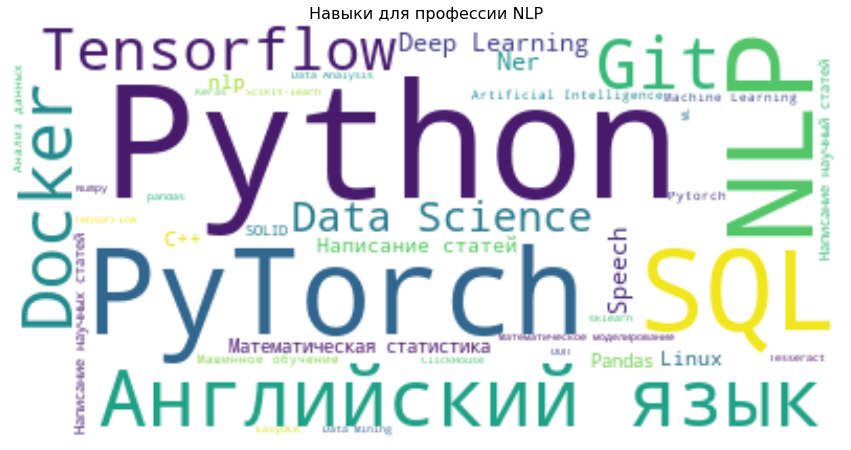

In [5]:
wc = WordCloud(background_color="white")
wc.generate_from_frequencies(all_skills)
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title(f"Навыки для профессии {what_to_find}", fontsize=16)
plt.show()